# Discover patterns of potentially useful outliers in a given dataset of issues

### Data Set File:  issues.csv

In [806]:
import os

import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

from datetime import date

%matplotlib inline



## Load the issues.csv file into a dataframe object

In [807]:
################################################################
#############   Read Dataset of issues from CSV File ###########
################################################################

issues_df = pd.read_csv('issues.csv')

In [808]:
# Sanity test we have good data

issues_df.head()

,Issue #,OriginationPhase,DetectionPhase,Category,Priority,Status,Created_at,Closed_at,Author
0,1,Requirements,Coding,Bug,Critical,Approved,2/24/2017,NaN,Smith
1,2,Design,Testing,Enhancement,High,Approved,2/25/2017,NaN,Roy
2,3,Requirements,Design,Inquiry,Low,Rejected,2/26/2017,3/7/2017,Linda
3,4,Testing,Field,Bug,High,Completed,2/27/2017,3/8/2017,Kim
4,5,Documentation,Field,Enhancement,Major,pendingReview,2/28/2017,NaN,James


In [809]:
issues_df.Created_at[:1]

0    2/24/2017
Name: Created_at, dtype: object

## Data Wrangling and Munging to deal with dtype objects


In [810]:
# Data Wrangling and Munging

issues_df['Created_at']=pd.to_datetime(issues_df['Created_at'])

issues_df['Closed_at']=pd.to_datetime(issues_df['Closed_at'])

In [811]:

x = issues_df['Created_at'][1]

type(x)


pandas.tslib.Timestamp

In [812]:
x

Timestamp('2017-02-25 00:00:00')

In [813]:
print x.year,'-', x.month , '-' , x.day


2017 - 2 - 25


In [814]:
# Sanity Test

issues_df.head()

,Issue #,OriginationPhase,DetectionPhase,Category,Priority,Status,Created_at,Closed_at,Author
0,1,Requirements,Coding,Bug,Critical,Approved,2017-02-24,NaT,Smith
1,2,Design,Testing,Enhancement,High,Approved,2017-02-25,NaT,Roy
2,3,Requirements,Design,Inquiry,Low,Rejected,2017-02-26,2017-03-07,Linda
3,4,Testing,Field,Bug,High,Completed,2017-02-27,2017-03-08,Kim
4,5,Documentation,Field,Enhancement,Major,pendingReview,2017-02-28,NaT,James


## Slice/Dice/Select/Filter rows/columns based on date values

#### Select the data based on date range for month of January


In [815]:
# Select the data based on date range for month of January
 
in_date_range_issues = issues_df[issues_df["Created_at"].isin(pd.date_range("2017-01-1", "2017-01-31"))]


In [816]:
in_date_range_issues.head()

,Issue #,OriginationPhase,DetectionPhase,Category,Priority,Status,Created_at,Closed_at,Author
102,103,Documentation,Field,Enhancement,Major,pendingReview,2017-01-05,NaT,Sandy
103,104,Design,Testing,Bug,Critical,Approved,2017-01-06,NaT,David
104,105,Requirements,Coding,Bug,High,Approved,2017-01-07,NaT,Michelle
105,106,Requirements,Design,Inquiry,Low,Approved,2017-01-08,NaT,Jeremy
106,107,Testing,Field,Bug,Medium,Approved,2017-01-09,NaT,Joseph


In [817]:
# How many issues created in month of January

in_date_range_issues['Created_at'].count()

131

#### Select the data based on date range for month of February


In [818]:
# Select the data based on date range for month of February
 
in_date_range_issues = issues_df[issues_df["Created_at"].isin(pd.date_range("2017-02-1", "2017-02-28"))]


In [819]:
in_date_range_issues.head()

,Issue #,OriginationPhase,DetectionPhase,Category,Priority,Status,Created_at,Closed_at,Author
0,1,Requirements,Coding,Bug,Critical,Approved,2017-02-24,NaT,Smith
1,2,Design,Testing,Enhancement,High,Approved,2017-02-25,NaT,Roy
2,3,Requirements,Design,Inquiry,Low,Rejected,2017-02-26,2017-03-07,Linda
3,4,Testing,Field,Bug,High,Completed,2017-02-27,2017-03-08,Kim
4,5,Documentation,Field,Enhancement,Major,pendingReview,2017-02-28,NaT,James


In [820]:
# How many issues created in month of February

in_date_range_issues['Created_at'].count()

164

In [821]:
# Create Weekly index

weekly_index = pd.date_range('2017-1-1', '2018-1-1', freq='W')


In [822]:
# Create Monthly index

monthly_index = pd.date_range('2016-12-1', '2018-1-1', freq='BM')


In [823]:
# Sanity test for week index

weekly_index[:13]

DatetimeIndex(['2017-01-01', '2017-01-08', '2017-01-15', '2017-01-22',
               '2017-01-29', '2017-02-05', '2017-02-12', '2017-02-19',
               '2017-02-26', '2017-03-05', '2017-03-12', '2017-03-19',
               '2017-03-26'],
              dtype='datetime64[ns]', freq='W-SUN')

In [824]:
# Sanity test for month  index

monthly_index[:12]

DatetimeIndex(['2016-12-30', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-28', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-29', '2017-10-31', '2017-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [825]:
weekly_index[:1]

DatetimeIndex(['2017-01-01'], dtype='datetime64[ns]', freq='W-SUN')

In [826]:
# Print how many issues openned in the 2nd week of January

(issues_df[issues_df["Created_at"].isin(pd.date_range(weekly_index[1], weekly_index[2]))]).count()


Issue #             61
OriginationPhase    61
DetectionPhase      61
Category            61
Priority            61
Status              61
Created_at          61
Closed_at           25
Author              61
dtype: int64

In [827]:
# Print how many issues created weekly

cols = ['Week Ending', 'Total Number of Issues']
list_weekly_iisues = []


weekly_issues = []

for i in range(1, 52):
    list_weekly_iisues.append([weekly_index[i], (issues_df[issues_df['Created_at'].isin(pd.date_range(weekly_index[i], weekly_index[i+1]))]['Created_at']).count()])


weekly_issues = pd.DataFrame(list_weekly_iisues, columns=cols)




In [828]:
weekly_issues[:5]

,Week Ending,Total Number of Issues
0,2017-01-08,61
1,2017-01-15,57
2,2017-01-22,12
3,2017-01-29,0
4,2017-02-05,23


In [829]:
# Create weekly index for every row

list_week_numbers_for_issues = []


for index, row in issues_df.iterrows():
        list_week_numbers_for_issues.append(row.Created_at.week)


issues_df_with_week_number = issues_df
issues_df_with_week_number['Week'] = Series(list_week_numbers_for_issues, index=issues_df.index)
    

In [830]:
# Sanity test for week number added

issues_df_with_week_number.head()

,Issue #,OriginationPhase,DetectionPhase,Category,Priority,Status,Created_at,Closed_at,Author,Week
0,1,Requirements,Coding,Bug,Critical,Approved,2017-02-24,NaT,Smith,8
1,2,Design,Testing,Enhancement,High,Approved,2017-02-25,NaT,Roy,8
2,3,Requirements,Design,Inquiry,Low,Rejected,2017-02-26,2017-03-07,Linda,8
3,4,Testing,Field,Bug,High,Completed,2017-02-27,2017-03-08,Kim,9
4,5,Documentation,Field,Enhancement,Major,pendingReview,2017-02-28,NaT,James,9


In [831]:
# Create weekly index for every row

list_month_numbers_for_issues = []


for index, row in issues_df.iterrows():
        list_month_numbers_for_issues.append(row.Created_at.month)


issues_df_with_month_number = issues_df
issues_df_with_month_number['Month'] = Series(list_month_numbers_for_issues, index=issues_df.index)
    

In [832]:
# Sanity test for week number added

issues_df_with_month_number.head()

,Issue #,OriginationPhase,DetectionPhase,Category,Priority,Status,Created_at,Closed_at,Author,Week,Month
0,1,Requirements,Coding,Bug,Critical,Approved,2017-02-24,NaT,Smith,8,2
1,2,Design,Testing,Enhancement,High,Approved,2017-02-25,NaT,Roy,8,2
2,3,Requirements,Design,Inquiry,Low,Rejected,2017-02-26,2017-03-07,Linda,8,2
3,4,Testing,Field,Bug,High,Completed,2017-02-27,2017-03-08,Kim,9,2
4,5,Documentation,Field,Enhancement,Major,pendingReview,2017-02-28,NaT,James,9,2


In [833]:
# Print how many issues created weekly - DETAILED

cols = ['Week Ending', 'Total Number of Issues', 'Crirical','High']
list_weekly_iisues = []


weekly_issues = []

for i in range(1, 52):
    list_weekly_iisues.append([weekly_index[i], 
                                    (issues_df[issues_df['Created_at'].isin(pd.date_range(weekly_index[i], weekly_index[i+1]))]['Created_at']).count(),
                                    (issues_df[(issues_df.Priority == 'Critical') & 
                                              (issues_df['Created_at'].isin(pd.date_range(weekly_index[i], weekly_index[i+1])))]['Priority']).count(),
                                      (issues_df[(issues_df.Priority == 'High') & 
                                              (issues_df['Created_at'].isin(pd.date_range(weekly_index[i], weekly_index[i+1])))]['Priority']).count()])


weekly_issues = pd.DataFrame(list_weekly_iisues, columns=cols)


In [834]:
weekly_issues[:5]

,Week Ending,Total Number of Issues,Crirical,High
0,2017-01-08,61,0,7
1,2017-01-15,57,5,23
2,2017-01-22,12,0,12
3,2017-01-29,0,0,0
4,2017-02-05,23,3,5


In [835]:
# Print basic stat about the weekly issues

weekly_issues['Total Number of Issues'].describe()


count     51.000000
mean      44.039216
std       60.744699
min        0.000000
25%       12.000000
50%       25.000000
75%       56.000000
max      314.000000
Name: Total Number of Issues, dtype: float64

In [836]:
# Print how many issues created monthly

cols = ['Month Ending', 'Total Number of Issues']
list_monthly_iisues = []


monthly_issues = []

for i in range(0, 11):
    list_monthly_iisues.append([monthly_index[i+1], (issues_df[issues_df['Created_at'].isin(pd.date_range(monthly_index[i], monthly_index[i+1]))]['Created_at']).count()])


monthly_issues = pd.DataFrame(list_monthly_iisues, columns=cols)


In [837]:
monthly_issues[:12]

,Month Ending,Total Number of Issues
0,2017-01-31,131
1,2017-02-28,164
2,2017-03-31,610
3,2017-04-28,150
4,2017-05-31,163
5,2017-06-30,127
6,2017-07-31,104
7,2017-08-31,226
8,2017-09-29,23
9,2017-10-31,111


In [838]:

# Create a GROUPER for every [OriginationPhase, category]

issues_grouper = issues_df.groupby(['OriginationPhase','Category'])


#for key, group in issues_grouper:
#    print key
#    print group


# PivotTable like output can be produced using value_counts on the grouper object
issues_grouper['Status'].value_counts()



OriginationPhase  Category     Status       
Coding            Bug          Completed        204
                               Rejected           2
                  Inquiry      Completed          1
Design            Bug          Approved          46
                               inProgress        18
                               Completed          3
                  Enhancement  Approved          60
                               Completed          1
                               Rejected           1
                  Inquiry      inProgress       249
                               Approved         146
                               Completed         37
                               Rejected          17
                               pendingReview      1
Documentation     Bug          pendingReview     14
                               Rejected           1
                  Enhancement  pendingReview    224
                               Completed         40
                   

In [839]:
type(issues_grouper['Status'].value_counts())

pandas.core.series.Series

In [840]:
# Lets calculate the number of issues opened based on Multilevel indexing
# The count is sorted in ascending order

multi_level_indexing_for_issues = issues_grouper['Status'].value_counts().sort_values(ascending=False)


In [841]:
multi_level_indexing_for_issues.values

array([306, 249, 224, 204, 179, 146, 115, 101,  60,  58,  46,  46,  40,
        37,  21,  19,  18,  17,  14,  14,  10,  10,   9,   8,   8,   7,
         6,   5,   4,   3,   3,   2,   2,   1,   1,   1,   1,   1,   1,
         1,   1,   1], dtype=int64)

In [842]:
# What is first valid index?

multi_level_indexing_for_issues.first_valid_index()

('Testing', 'Bug', 'Completed')

In [843]:
# Get the count associated with the first valid index
multi_level_indexing_for_issues.get(multi_level_indexing_for_issues.first_valid_index())

306

In [844]:
# Get most frequent issues opened using the index [OriginationPhase  Category  Status] 
multi_level_indexing_for_issues.head(5)


OriginationPhase  Category     Status       
Testing           Bug          Completed        306
Design            Inquiry      inProgress       249
Documentation     Enhancement  pendingReview    224
Coding            Bug          Completed        204
Requirements      Inquiry      Rejected         179
Name: Status, dtype: int64

In [845]:
# We can also find the index with max value
multi_level_indexing_for_issues.idxmax()

('Testing', 'Bug', 'Completed')

In [846]:
# Find the label of th elast index

multi_level_indexing_for_issues.last_valid_index()

('Documentation', 'Bug', 'Rejected')

In [847]:
# Print general statistics

multi_level_indexing_for_issues.describe()

count     42.000000
mean      47.619048
std       77.383414
min        1.000000
25%        2.250000
50%       10.000000
75%       46.000000
max      306.000000
Name: Status, dtype: float64

In [848]:
# Print how many issues created for every Status value 

issues_df.Status.value_counts()

Completed        750
inProgress       385
pendingReview    325
Approved         297
Rejected         243
Name: Status, dtype: int64

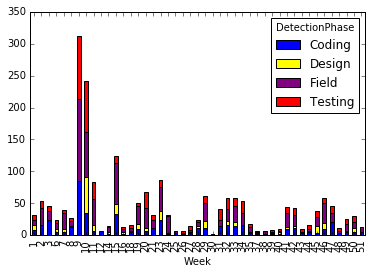

In [849]:
# Plot in Bar Chart the total number of issues created every week for every phase 

weekly_grouper = issues_df_with_week_number.groupby(['Week','DetectionPhase']).DetectionPhase.count()

weekly_grouper_fig = weekly_grouper.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green', 'brown'], grid=False)

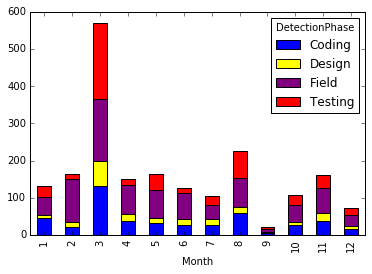

In [850]:
# Plot in Bar Chart the total number of issues created every month for every phase 

monthly_grouper = issues_df_with_week_number.groupby(['Month','DetectionPhase']).DetectionPhase.count()

monthly_grouper_fig = monthly_grouper.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green', 'brown'], grid=False)

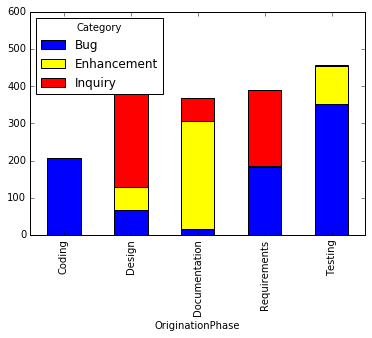

In [851]:
# Plot in Bar Chart the total number of issues for every Category in Every OriginationPhase

LabelsReviewedByDate = issues_df.groupby(['OriginationPhase','Category']).Category.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'yellow', 'red'], grid=False)

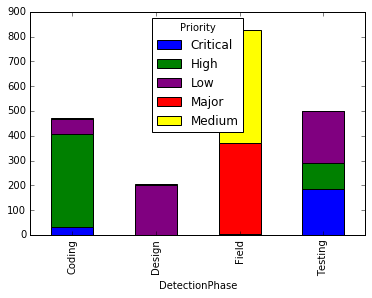

In [852]:
# Plot in Bar Chart the total number of issues for every Priority level in Every DetectionPhase

LabelsReviewedByDate = issues_df.groupby(['DetectionPhase','Priority']).Priority.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','green', 'purple', 'red', 'yellow'], grid=False)

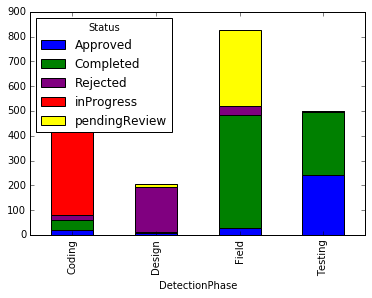

In [853]:
# Plot in Bar Chart the total number of issues for every Priority level in Every DetectionPhase

LabelsReviewedByDate = issues_df.groupby(['DetectionPhase','Status']).Status.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','green', 'purple', 'red', 'yellow'], grid=False)

#       For every query and/or Metric/Stat                
#      Add your code in an individual cell in this ipynb script       


In [2]:
# Add your code here  for Query  #1 for Metric/Stat
daily_grouper = issues_df_with_week_number.groupby(['Monthly','DetectionPhase']).DetectionPhase.count()

dai[ly_grouper_fig = monthly_grouper.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green', 'brown'], grid=False)

NameError: name 'issues_df_with_week_number' is not defined

In [855]:
# Add your code here  for Query  #2 for Metric/Stat


